Written Analysis

Summary:
The data consisted of records of 39170 students in 15 schools.
Students took two exams: math and reading. The average reading score was slightly higher (82%) than the average math score (79%). 
The students who successfully passed math were equal to 75%.
The rate of students who passed the reading constituted 86%.

The overall passing score for both exams constituted 65%, meaning that more than a third of the students failed.


Conclusions/comparisons:

When overall passing scores in school are considerably lower than passing percentage in math and reading, it tells us that the student's score distributions are not even. There are low-performing students who need additional attention. You can see seven of such schools on Picture A. Schools Passing Scores: 
Bailey High School       54.642283
Figueroa High School     53.204476
Ford High School         54.289887
Hernandez High School    53.527508
Huang High School        53.513884
Johnson High School      53.539172
Rodriguez High School    52.988247

The schools that are in the top-5 of overall passing rates also have even distribution of students scores in ostudents who successfully passed math and reading. 

Interestingly, the math and reading scores for 11th grades were slightly higher than in other grades in a number of schools, more details on the picture B. Schools Math Scores and picture C.Schools Reading Scores.

List of schools where 11th grades Math Scores were higher than in other grades. 
	                9th	        10th        11th	    12th
Bailey High School	77.083676	76.996772	80.575873	76.492218
Figueroa High Sch	76.403037	76.539974	80.575873	77.151369
Ford High School	77.361345	77.672316	80.575873	76.179963
Hernandez High Sch	77.438495	77.337408	80.575873	77.186567
Huang High School	77.027251	75.908735	80.575873	77.225641
Johnson High School	77.187857	76.691117	80.575873	76.863248
Rodriguez High Sch	76.859966	76.612500	80.575873	77.690748

List of schools where 11th grades Reading Scores were higher than in other grades. 
                    9th	        10th	    11th	    12th
Bailey High School	81.303155	80.907183	82.559485	80.912451
Figueroa High Scho	81.198598	81.408912	82.559485	81.384863
Ford High School	80.632653	81.262712	82.559485	80.662338
Hernandez High Scho	80.866860	80.660147	82.559485	80.857143
Huang High School	81.290284	81.512386	82.559485	80.305983
Johnson High School	81.260714	80.773431	82.559485	81.227564
Rodriguez High Sch	80.993127	80.629808	82.559485	80.376426

This scores distribution brings us back to the list of schools where the overall passing is lower than the passing levels for math and reading.  

Schools with higher budgets did not yield better test results. By contrast, schools with higher spending 645-675 per student underperformed compared to schools with smaller budgets (585 per student).

As a whole, smaller and medium-sized schools outperformed large-sized schools on passing math performances (89-91% passing vs 67%). All large-scale schools' overall passing scores are considerably lower than math and reading passing. A single exception is Wilson High School, however this schools serves 2283 studens that is on the low end of large scale schools.

As a whole, charter schools outperformed the public district schools across all metrics. However, more analysis will be required to glean if the effect is due to school practices or the fact that charter schools tend to serve smaller student populations per school.

In [2]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


In [3]:
school_count = school_data_complete["school_name"].value_counts()
len(school_count)

15

In [4]:
student_count = school_data_complete["Student ID"].value_counts()
len(student_count)

39170

In [5]:
# Calculate the total budget
total_budget = school_data["budget"].sum()
total_budget

24649428

In [6]:
# Calculate the average (mean) math score
average_math_score = school_data_complete["math_score"].mean()
average_math_score 

78.98537145774827

In [7]:
# Calculate the average (mean) reading score
average_reading_score = school_data_complete["reading_score"].mean()
average_reading_score 

81.87784018381414

In [8]:
# Use the following to calculate the percentage of students who passed math (math scores greather than or equal to 70)
passing_math_count = school_data_complete[(school_data_complete["math_score"] >= 70)].count()["student_name"]
student_count = float(school_data_complete["Student ID"].count())
passing_math_percentage = passing_math_count / student_count * 100
print(passing_math_percentage)

74.9808526933878


In [9]:
# Calculate the percentage of students who passeed reading (hint: look at how the math percentage was calculated)  
passing_reading_count = school_data_complete[(school_data_complete["reading_score"] >= 70)].count()["student_name"]
passing_reading_percentage = passing_reading_count / student_count * 100
print(passing_reading_percentage)

85.80546336482001


In [10]:
# Use the following to calculate the percentage of students that passed math and reading
passing_math_reading_count = school_data_complete[
    (school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)
].count()["student_name"]
overall_passing_rate = passing_math_reading_count /  float(student_count) * 100
overall_passing_rate

65.17232575950983

In [11]:
# Create a high-level snapshot of the district's key metrics in a DataFrame

district_summary = {
    "Total Schools":[school_count.count()], 
    "Total Students":[(student_count)],
    "Total Budget":[total_budget], 
    "Average Math Score":[average_math_score ], 
    "Average Reading Score":[average_reading_score], 
    "Passing Math":[passing_math_percentage], 
    "Passing Reading":[passing_reading_percentage],
    "Overall Passing":[overall_passing_rate]
}

# Formatting
district_summary["Total Students"] = "{:,}".format(district_summary["Total Students"][0])
district_summary["Total Budget"] = "${:,.2f}".format(district_summary["Total Budget"][0])

# Display the DataFrame
district_summary=pd.DataFrame(district_summary)
district_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,Passing Math,Passing Reading,Overall Passing
0,15,"39,170.0","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


School Summary


In [12]:
# Use the code provided to select the school type
school_types = school_data.set_index(["school_name"])["type"]


In [13]:
# Calculate the total student count
per_school_counts = school_data_complete.groupby(["school_name"])["Student ID"].count()
per_school_counts.sum()

39170

In [14]:
# Calculate the total school budget and per capita spending
per_school_budget = school_data_complete.groupby(["school_name"]).mean()["budget"]
per_school_capita = per_school_budget / per_school_counts

In [15]:
# Calculate the average test scores
per_school_math = school_data_complete.groupby(["school_name"]).mean()["math_score"]
per_school_reading = school_data_complete.groupby(["school_name"]).mean()["reading_score"]

In [16]:
# Calculate the number of schools with math scores of 70 or higher
school_passing_math = school_data_complete[school_data_complete["math_score"] >= 70].groupby(["school_name"]).count()["student_name"]
passing_math_percentage = school_passing_math / per_school_counts * 100
print(passing_math_percentage)


school_name
Bailey High School       66.680064
Cabrera High School      94.133477
Figueroa High School     65.988471
Ford High School         68.309602
Griffin High School      93.392371
Hernandez High School    66.752967
Holden High School       92.505855
Huang High School        65.683922
Johnson High School      66.057551
Pena High School         94.594595
Rodriguez High School    66.366592
Shelton High School      93.867121
Thomas High School       93.272171
Wilson High School       93.867718
Wright High School       93.333333
dtype: float64


In [17]:
# Calculate the number of schools with reading scores of 70 or higher
school_passing_reading = school_data_complete[school_data_complete["reading_score"] >= 70].groupby(["school_name"]).count()["student_name"]
passing_reading_percentage = school_passing_reading / per_school_counts * 100
print(passing_reading_percentage)

school_name
Bailey High School       81.933280
Cabrera High School      97.039828
Figueroa High School     80.739234
Ford High School         79.299014
Griffin High School      97.138965
Hernandez High School    80.862999
Holden High School       96.252927
Huang High School        81.316421
Johnson High School      81.222432
Pena High School         95.945946
Rodriguez High School    80.220055
Shelton High School      95.854628
Thomas High School       97.308869
Wilson High School       96.539641
Wright High School       96.611111
dtype: float64


In [18]:
passing_math_and_reading = school_data_complete[
    (school_data_complete["reading_score"] >= 70) & (school_data_complete["math_score"] >= 70)
].groupby(["school_name"]).count()["student_name"]
overall_passing_rate = (passing_math_and_reading / per_school_counts) * 100
print(overall_passing_rate)

school_name
Bailey High School       54.642283
Cabrera High School      91.334769
Figueroa High School     53.204476
Ford High School         54.289887
Griffin High School      90.599455
Hernandez High School    53.527508
Holden High School       89.227166
Huang High School        53.513884
Johnson High School      53.539172
Pena High School         90.540541
Rodriguez High School    52.988247
Shelton High School      89.892107
Thomas High School       90.948012
Wilson High School       90.582567
Wright High School       90.333333
dtype: float64


In [19]:
# Create a DataFrame called `per_school_summary` with columns for the calculations above.
per_school_summary = {
    "School Type": school_types,
    "Total Students": per_school_counts,
    "Total School Budget": per_school_budget,
    "Per Student Budget": per_school_capita,
    "Average Math Score": per_school_math,
    "Average Reading Score": per_school_reading,
    "Passing Math": passing_math_percentage,
    "Passing Reading": passing_reading_percentage,
     "Overall Passing":overall_passing_rate
}

# Formatting
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)

# Display the DataFrame
per_school_summary = pd.DataFrame(per_school_summary)
per_school_summary.index.name = "School Name"
per_school_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Passing Math,Passing Reading,Overall Passing
School Name,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


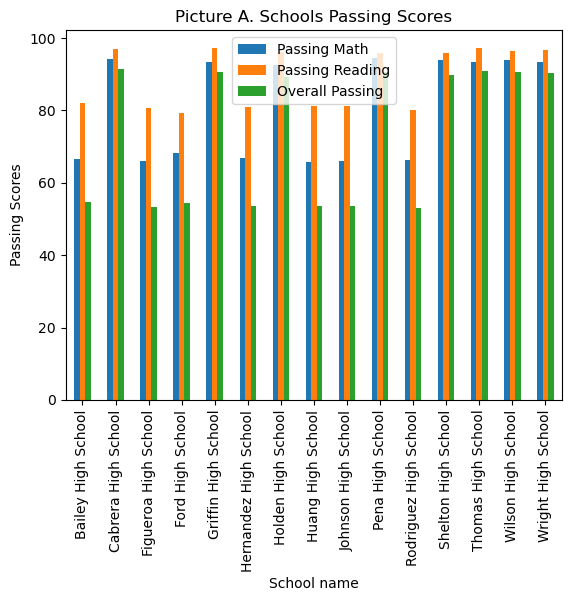

In [20]:
students_scores=per_school_summary[["Passing Math", "Passing Reading","Overall Passing"]]
students_scores_plot=students_scores.plot(kind='bar',xlabel="School name", ylabel="Passing Scores",title="Picture A. Schools Passing Scores")

Highest-Performing Schools (by % Overall Passing)¶

In [21]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
highest_performing_schools= per_school_summary.sort_values("Overall Passing", ascending= False)
highest_performing_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Passing Math,Passing Reading,Overall Passing
School Name,,,,,,,,,
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


In [22]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
lowest_performing_schools= per_school_summary.sort_values("Overall Passing", ascending= True)
lowest_performing_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Passing Math,Passing Reading,Overall Passing
School Name,,,,,,,,,
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


In [23]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by "school_name" and take the mean of each.
ninth_graders_scores = ninth_graders.groupby(["school_name"]).mean()
tenth_graders_scores = tenth_graders.groupby(["school_name"]).mean()
eleventh_graders_scores = eleventh_graders.groupby(["school_name"]).mean()
twelfth_graders_scores = twelfth_graders.groupby(["school_name"]).mean()

# # Use the code to select only the `math_score`
ninth_grade_math_scores = ninth_graders_scores["math_score"]
tenth_grader_math_scores = tenth_graders_scores["math_score"]
eleventh_grader_math_scores = eleventh_graders_scores.mean()["math_score"]
twelfth_grader_math_scores = twelfth_graders_scores["math_score"]

# # Combine each of the scores above into single DataFrame called `math_scores_by_grade`
math_scores_by_grade={
    
    "9th":ninth_grade_math_scores,
    "10th":tenth_grader_math_scores,
    "11th":eleventh_grader_math_scores,
    "12th":twelfth_grader_math_scores
}


math_scores_by_grade = pd.DataFrame(math_scores_by_grade)
per_school_summary.index.name = "School Name"


# # Minor data wrangling
math_scores_by_grade.index.name = None

# # Display the DataFrame
math_scores_by_grade

,9th,10th,11th,12th
Bailey High School,77.083676,76.996772,80.575873,76.492218
Cabrera High School,83.094697,83.154506,80.575873,83.277487
Figueroa High School,76.403037,76.539974,80.575873,77.151369
Ford High School,77.361345,77.672316,80.575873,76.179963
Griffin High School,82.044010,84.229064,80.575873,83.356164
Hernandez High School,77.438495,77.337408,80.575873,77.186567
Holden High School,83.787402,83.429825,80.575873,82.855422
Huang High School,77.027251,75.908735,80.575873,77.225641
Johnson High School,77.187857,76.691117,80.575873,76.863248
Pena High School,83.625455,83.372000,80.575873,84.121547


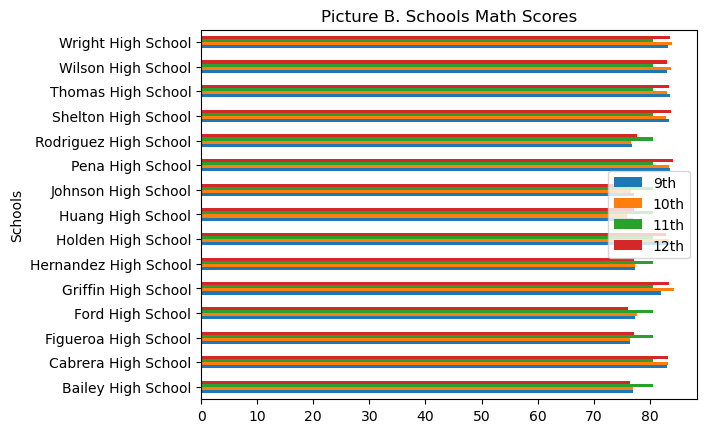

In [29]:
math_scores=math_scores_by_grade[["9th", "10th","11th","12th"]]
math_9_10_11_12_scores_plot=math_scores.plot(kind='barh',xlabel="Schools",title="Picture B. Schools Math Scores")

In [25]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Use the code to select only the `reading_score`.
ninth_grade_reading_scores = ninth_graders_scores["reading_score"]
tenth_grader_reading_scores = tenth_graders_scores["reading_score"]
eleventh_grader_reading_scores = eleventh_graders_scores.mean()["reading_score"]
twelfth_grader_reading_scores = twelfth_graders_scores["reading_score"]

# Combine each of the scores above into single DataFrame called `reading_scores_by_grade`
reading_scores_by_grade={
    
    "9th":ninth_grade_reading_scores,
    "10th":tenth_grader_reading_scores,
    "11th":eleventh_grader_reading_scores,
    "12th":twelfth_grader_reading_scores
}

reading_scores_by_grade = pd.DataFrame(reading_scores_by_grade)
per_school_summary.index.name = "School Name"

# Minor data wrangling
reading_scores_by_grade = reading_scores_by_grade[["9th", "10th", "11th", "12th"]]
reading_scores_by_grade.index.name = None

# # Display the DataFrame
reading_scores_by_grade

,9th,10th,11th,12th
Bailey High School,81.303155,80.907183,82.559485,80.912451
Cabrera High School,83.676136,84.253219,82.559485,84.287958
Figueroa High School,81.198598,81.408912,82.559485,81.384863
Ford High School,80.632653,81.262712,82.559485,80.662338
Griffin High School,83.369193,83.706897,82.559485,84.013699
Hernandez High School,80.866860,80.660147,82.559485,80.857143
Holden High School,83.677165,83.324561,82.559485,84.698795
Huang High School,81.290284,81.512386,82.559485,80.305983
Johnson High School,81.260714,80.773431,82.559485,81.227564
Pena High School,83.807273,83.612000,82.559485,84.591160


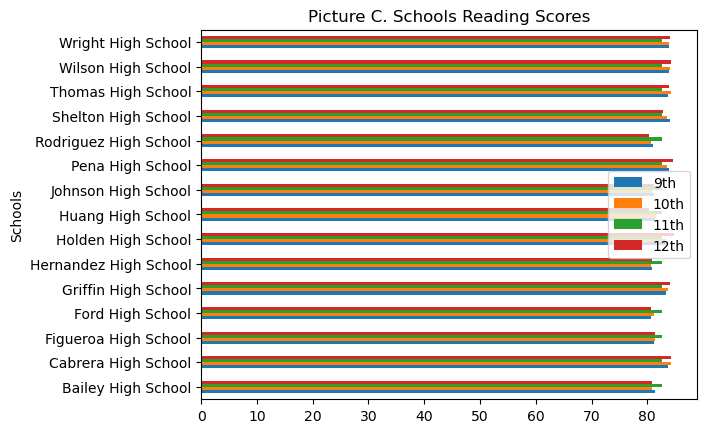

In [30]:
reading_scores=reading_scores_by_grade[["9th", "10th","11th","12th"]]
r_9_10_11_12_scores_plot=reading_scores.plot(kind='barh',xlabel="Schools",title="Picture C. Schools Reading Scores")

Scores by School Spending

In [58]:
# Establish the bins 
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]

In [59]:
# Create a copy of the per_school_summary DataFrame
school_spending_df = per_school_summary.copy()

# Remove non-numeric characters from the "Per Student Budget" column and convert to float
school_spending_df["Per Student Budget"] = school_spending_df["Per Student Budget"].str.replace("$","").astype(float)

# Format the "Per Student Budget" column as a currency string with two decimal places and a dollar sign
school_spending_df["Per Student Budget"] = school_spending_df["Per Student Budget"].map("${:,.2f}".format)


/var/folders/xq/xdbqztz92zs24q39hvzwj65m0000gn/T/ipykernel_1003/208887876.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  school_spending_df["Per Student Budget"] = school_spending_df["Per Student Budget"].str.replace("$","").astype(float)


In [60]:
# Remove non-numeric characters from the "Per Student Budget" column and convert to float
school_spending_df["Per Student Budget"] = school_spending_df["Per Student Budget"].str.replace("$","").astype(float)
# Bin the data by spending ranges per student
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(school_spending_df["Per Student Budget"], spending_bins, labels=labels)
school_spending_df.head(15)

/var/folders/xq/xdbqztz92zs24q39hvzwj65m0000gn/T/ipykernel_1003/1456142964.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  school_spending_df["Per Student Budget"] = school_spending_df["Per Student Budget"].str.replace("$","").astype(float)


,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Passing Math,Passing Reading,Overall Passing,School Size,Spending Ranges (Per Student)
School Name,,,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",628.0,77.048432,81.033963,66.680064,81.933280,54.642283,Large (2000-5000),$585-630
Cabrera High School,Charter,1858,"$1,081,356.00",582.0,83.061895,83.975780,94.133477,97.039828,91.334769,Medium (1000-2000),<$585
Figueroa High School,District,2949,"$1,884,411.00",639.0,76.711767,81.158020,65.988471,80.739234,53.204476,Large (2000-5000),$630-645
Ford High School,District,2739,"$1,763,916.00",644.0,77.102592,80.746258,68.309602,79.299014,54.289887,Large (2000-5000),$630-645
Griffin High School,Charter,1468,"$917,500.00",625.0,83.351499,83.816757,93.392371,97.138965,90.599455,Medium (1000-2000),$585-630
Hernandez High School,District,4635,"$3,022,020.00",652.0,77.289752,80.934412,66.752967,80.862999,53.527508,Large (2000-5000),$645-680
Holden High School,Charter,427,"$248,087.00",581.0,83.803279,83.814988,92.505855,96.252927,89.227166,Small (<1000),<$585
Huang High School,District,2917,"$1,910,635.00",655.0,76.629414,81.182722,65.683922,81.316421,53.513884,Large (2000-5000),$645-680
Johnson High School,District,4761,"$3,094,650.00",650.0,77.072464,80.966394,66.057551,81.222432,53.539172,Large (2000-5000),$645-680


In [54]:
#  Calculate averages for the desired columns. 
spending_math_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Math Score"]
spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Reading Score"]
spending_passing_math = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Passing Math"]
spending_passing_reading = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Passing Reading"]
overall_passing_spending = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Overall Passing"]

In [37]:
# Assemble into DataFrame
spending_summary = {
    "Average Math Score":spending_math_scores,
    "Average Reading Score":spending_reading_scores,
    "Passing Math":spending_passing_math,
    "Passing Reading":spending_passing_reading,
    "Overall Passing":overall_passing_spending
}

spending_summary = pd.DataFrame(spending_summary)
spending_summary.index.name = "Spending Ranges (Per Student)"

# Display results
spending_summary

,Average Math Score,Average Reading Score,Passing Math,Passing Reading,Overall Passing
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,90.369459
$585-630,81.899826,83.155286,87.133538,92.718205,81.418596
$630-645,78.518855,81.624473,73.484209,84.391793,62.857656
$645-680,76.997210,81.027843,66.164813,81.133951,53.526855


Scores by School Size

In [38]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [40]:
# Use `pd.cut` on the "Total Students" column of the `per_school_summary` DataFrame.

per_school_summary["School Size"] = pd.cut(per_school_summary["Total Students"],size_bins,labels=labels)

per_school_summary.head(15)


,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Passing Math,Passing Reading,Overall Passing,School Size
School Name,,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,Large (2000-5000)
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,Medium (1000-2000)
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,Large (2000-5000)
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,Large (2000-5000)
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,Medium (1000-2000)
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,Large (2000-5000)
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,Small (<1000)
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,Large (2000-5000)
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,Large (2000-5000)


In [43]:
small_sizes_names = per_school_summary.loc[per_school_summary["School Size"] == "Small (<1000)"]
small_sizes_names

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Passing Math,Passing Reading,Overall Passing,School Size
School Name,,,,,,,,,,
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,Small (<1000)
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541,Small (<1000)


In [44]:
medium_sizes_names = per_school_summary.loc[per_school_summary["School Size"] == "Medium (1000-2000)"]
medium_sizes_names

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Passing Math,Passing Reading,Overall Passing,School Size
School Name,,,,,,,,,,
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,Medium (1000-2000)
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,Medium (1000-2000)
Shelton High School,Charter,1761,"$1,056,600.00",$600.00,83.359455,83.725724,93.867121,95.854628,89.892107,Medium (1000-2000)
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012,Medium (1000-2000)
Wright High School,Charter,1800,"$1,049,400.00",$583.00,83.682222,83.955000,93.333333,96.611111,90.333333,Medium (1000-2000)


In [45]:
large_sizes_names = per_school_summary.loc[per_school_summary["School Size"] == "Large (2000-5000)"]
large_sizes_names

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Passing Math,Passing Reading,Overall Passing,School Size
School Name,,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,Large (2000-5000)
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,Large (2000-5000)
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,Large (2000-5000)
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,Large (2000-5000)
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,Large (2000-5000)
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,Large (2000-5000)
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247,Large (2000-5000)
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567,Large (2000-5000)


In [80]:
# Calculate averages for the desired columns. 
size_math_scores = per_school_summary.groupby(["School Size"]).mean()["Average Math Score"]
size_reading_scores = per_school_summary.groupby(["School Size"]).mean()["Average Reading Score"]
size_passing_math = per_school_summary.groupby(["School Size"]).mean()["Passing Math"]
size_passing_reading = per_school_summary.groupby(["School Size"]).mean()["Passing Reading"]
size_overall_passing = per_school_summary.groupby(["School Size"]).mean()["Overall Passing"]

In [81]:
size_summary = {
    "Average Math Score":size_math_scores,
    "Average Reading Score":size_reading_scores,
    "Passing Math":size_passing_math,
    "Passing Reading":size_passing_reading,
    "Overall Passing":size_overall_passing
}

size_summary= pd.DataFrame(size_summary)
size_summary.index.name = "School Size"

# Display results
size_summary

,Average Math Score,Average Reading Score,Passing Math,Passing Reading,Overall Passing
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


Scores by School Type

In [82]:
# Group the per_school_summary DataFrame by "School Type" and average the results.
type_math_scores = per_school_summary.groupby(["School Type"]).mean()
type_reading_scores = per_school_summary.groupby(["School Type"]).mean()
type_passing_math = per_school_summary.groupby(["School Type"]).mean()
type_passing_reading = per_school_summary.groupby(["School Type"]).mean()
type_overall_passing = per_school_summary.groupby(["School Type"]).mean()

# Use the code provided to select new column data
average_math_score_by_type = type_math_scores["Average Math Score"]
average_reading_score_by_type = type_reading_scores["Average Reading Score"]
average_percent_passing_math_by_type = type_passing_math["Passing Math"]
average_percent_passing_reading_by_type = type_passing_reading["Passing Reading"]
average_percent_overall_passing_by_type = type_overall_passing["Overall Passing"]


In [83]:
# Assemble the new data by type into a DataFrame called `type_summary`
type_summary= {
    "Average Math Score":average_math_score_by_type,
    "Average Reading Score":average_reading_score_by_type,
    "Passing Math":average_percent_passing_math_by_type,
    "Passing Reading":average_percent_passing_reading_by_type,
    "Overall Passing":average_percent_overall_passing_by_type
}

type_summary= pd.DataFrame(type_summary)
type_summary.index.name = "School Type"


# Display results
type_summary

,Average Math Score,Average Reading Score,Passing Math,Passing Reading,Overall Passing
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208
